Dataset Overview:
         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221

Missing Values:
S4248SM144NCEN    0
dtype: int64


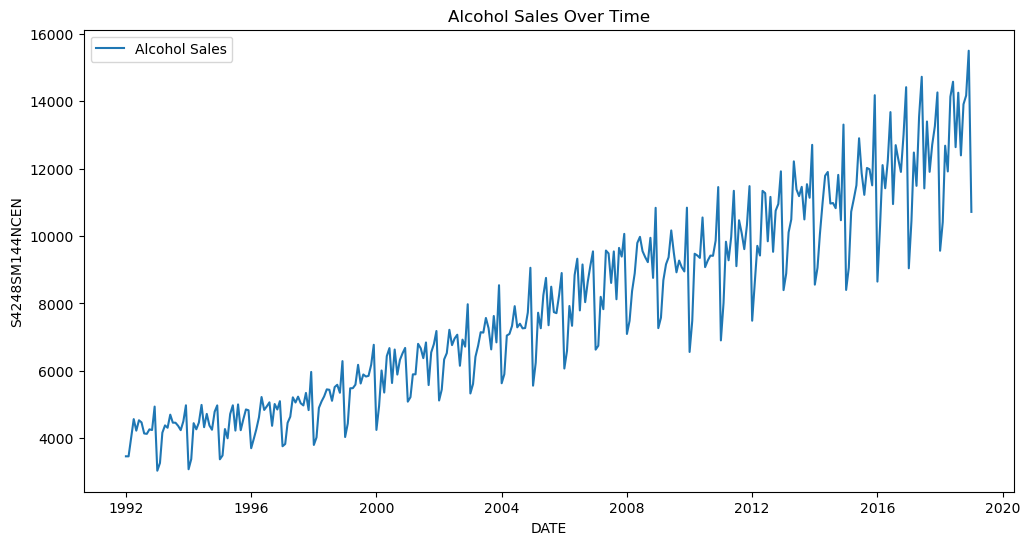

C:\Users\Aniket\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aniket\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aniket\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



ARIMA Model Evaluation:
RMSE: 2001.0286100484727
MAE: 1623.3984775484366


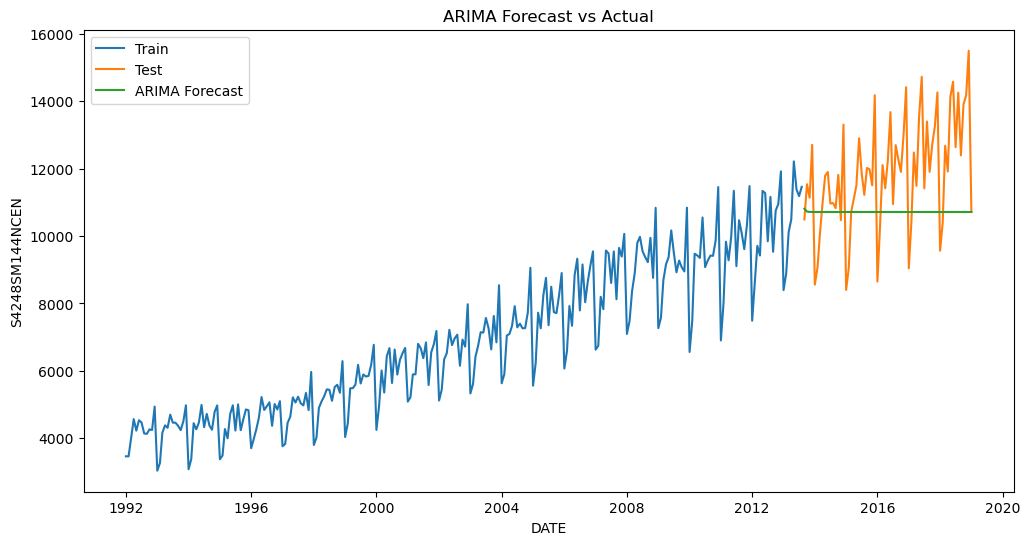

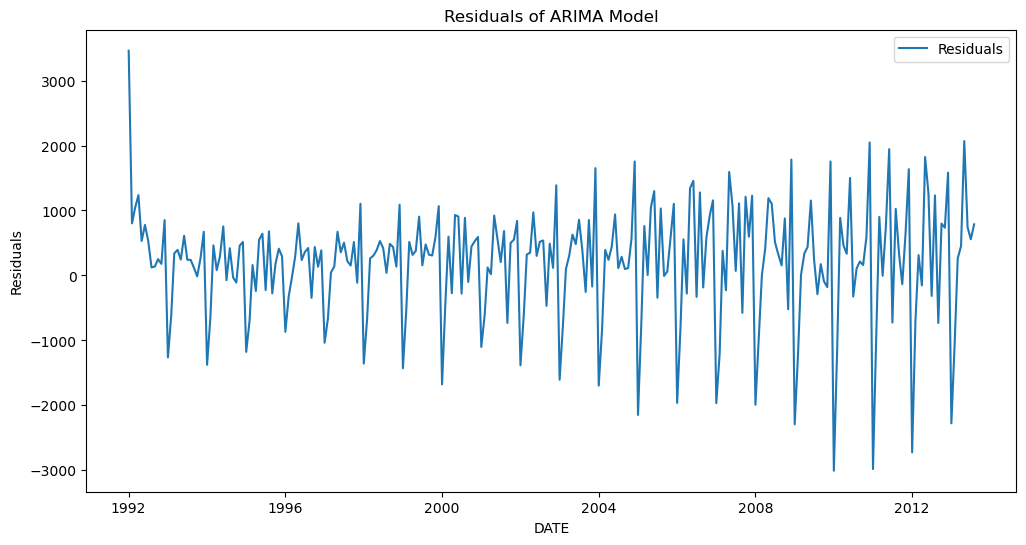

<Figure size 1200x600 with 0 Axes>

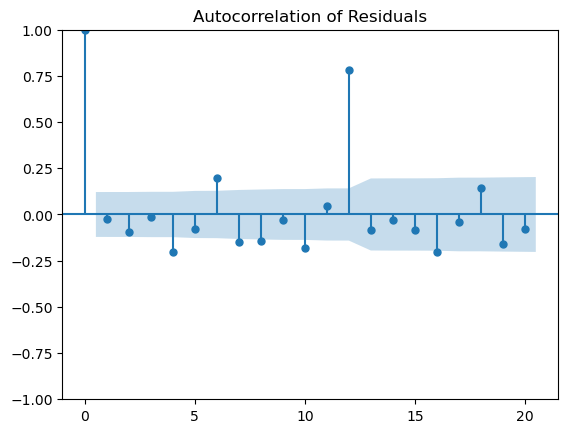

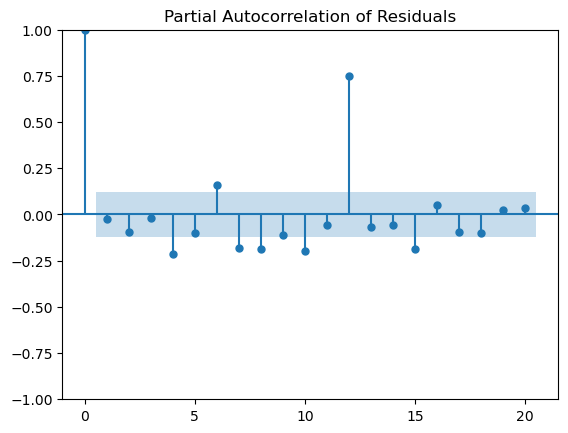

In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Aniket/Downloads/Alcohol_Sales.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
print("Dataset Overview:")
print(data.head())

# ------------------ Data Preprocessing ------------------ #
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert 'Date' to datetime format
data = data.sort_values('DATE')  # Sort by date
data.set_index('DATE', inplace=True)  # Set the Date column as the index

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values if needed
data.fillna(method='ffill', inplace=True)

# Plot the time series here sales coloumn = S4248SM144NCEN
plt.figure(figsize=(12, 6))
plt.plot(data['S4248SM144NCEN'], label='Alcohol Sales')
plt.title('Alcohol Sales Over Time')
plt.xlabel('DATE')
plt.ylabel('S4248SM144NCEN')
plt.legend()
plt.show()

# ------------------ ARIMA Model ------------------ #
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train['S4248SM144NCEN'], order=(1, 1, 1))  # Adjust (p, d, q) as needed
arima_result = arima_model.fit()

# Forecast
forecast_arima = arima_result.forecast(steps=len(test))
forecast_arima.index = test.index

# Evaluate ARIMA Model
rmse_arima = np.sqrt(mean_squared_error(test['S4248SM144NCEN'], forecast_arima))
mae_arima = mean_absolute_error(test['S4248SM144NCEN'], forecast_arima)
print("\nARIMA Model Evaluation:")
print(f"RMSE: {rmse_arima}")
print(f"MAE: {mae_arima}")

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train['S4248SM144NCEN'], label='Train')
plt.plot(test['S4248SM144NCEN'], label='Test')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('DATE')
plt.ylabel('S4248SM144NCEN')
plt.legend()
plt.show()


# Plot residuals of ARIMA model
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.xlabel('DATE')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=20, title='Autocorrelation of Residuals')
plot_pacf(residuals, lags=20, title='Partial Autocorrelation of Residuals')
plt.show()
